# <font color="green">Desafío - Prediciendo los precios de las casas</font>
## <font color="green">Descripción</font>

Como Cientista de Datos te han contratado en una importante empresa de propiedades para
analizar las diferentes características de algunas casas que se han vendido en el último
tiempo, y que se encuentran en el dataset **house_data.xlsx.** Esta base de datos contiene
diversas características de estas propiedades y su precio. Específicamente, se te solicita:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso
exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que
puedan afectar la calidad del modelo, si los hay.


In [33]:
houses = pd.read_excel('house_data.xlsx')
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [34]:
#contar nulos
houses.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [35]:
#buscar datos duplicados y eliminarlos
houses.duplicated().sum()

np.int64(0)

In [36]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
#modificar el vampo date para quedarnos con el año y pasarlo a int
houses['date'] = houses['date'].str[:4].astype(int)
houses['date']


,date
0,2014
1,2014
2,2015
3,2014
4,2015
...,...
21608,2014
21609,2015
21610,2014
21611,2015


In [38]:
#eliminamos la columna id
houses.drop('id', axis=1, inplace=True)
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
houses.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

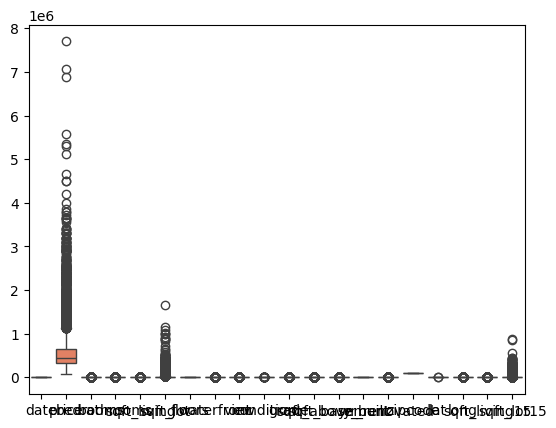

In [40]:
#graficamos boxplot en busca de valores atipicos
sns.boxplot(data=houses)

<Axes: xlabel='price'>

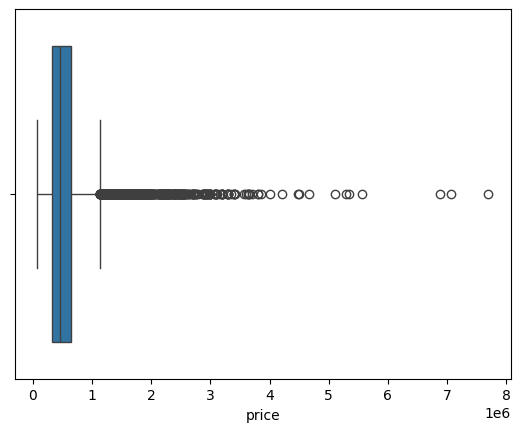

In [41]:
sns.boxplot(x='price', data=houses)

en este contexto no creo que deba eliminar los datos atipicos, ya que nos van a servir para hacer las predicciones

2. Realizar un análisis descriptivo de las variables para entender la distribución de los
datos y detectar posibles relaciones entre las características y los precios. En esto
debes incluir un análisis de correlaciones entre las variables principalmente con el
precio de las casas, comenta acerca de las variables con mayor correlación, ¿tienen
sentido?


<Axes: xlabel='long', ylabel='lat'>

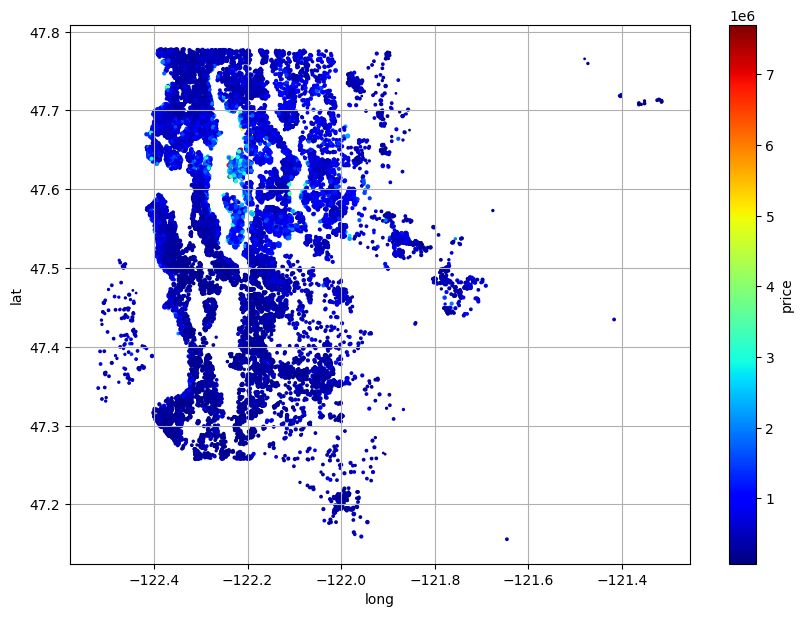

In [42]:
#voy a graficar un scatterplot con lat y long, añadiendo colores de azul a rojo
# ver la concentracion
houses.plot(kind="scatter", x="long", y="lat",
            grid=True, figsize=(10, 7),
            c="price", cmap=plt.get_cmap("jet"),
            colorbar=True, sharex=False, s=houses["bedrooms"])


Utilicé el numero de cuartos para definir un tamaño.
Al parecer, las casas mas caras se ubican un poco mas al norte de la parte central del mapa. y en esa misma zona hay casas cuyo precio es mucho mayor al promedio de precios.

In [43]:
corr_matrix = houses.corr()

In [44]:
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


<Axes: >

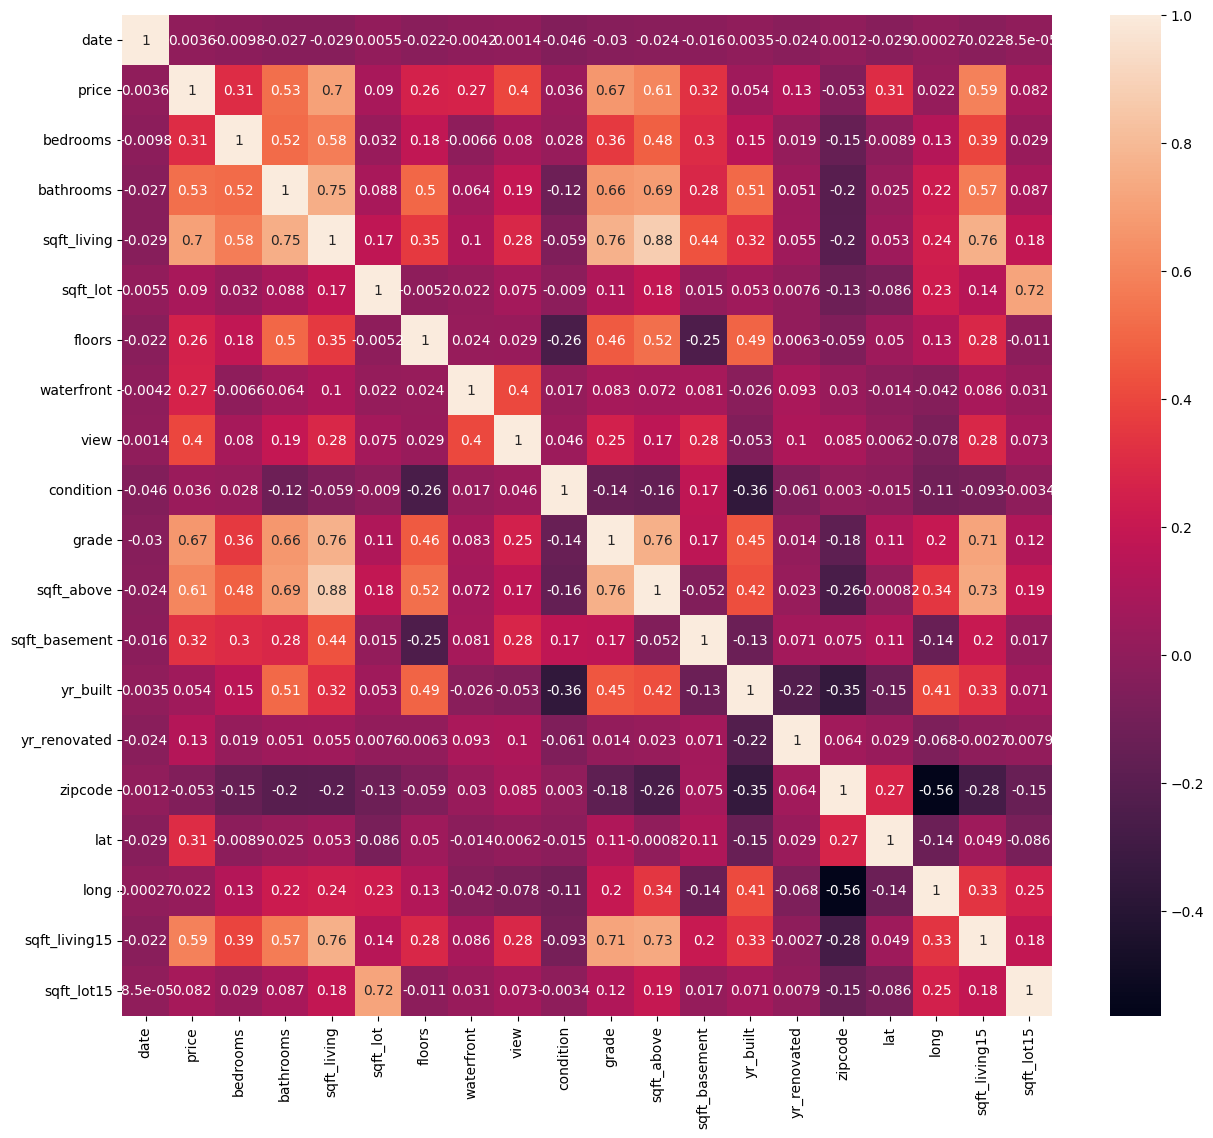

In [45]:
#lo desplegaré en un heat map para buscar correlaciones con el precio
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True,)

basado en los resultados de la matriz de correlacion y el heat map, las variables con mayor relacion al precio es sqft_living y grade por lo que una casa bien mantenida y un living room grandes pueden influir en el precio.

3. Divide los datos en conjuntos de entrenamiento y prueba de manera aleatoria o
estratificada, dejando un 33% para test, luego de eso aplica alguna técnica de
transformación de datos, como normalización o estandarización, para asegurar que
las variables estén en una escala comparable.
(hint: Recuerda que en la estandarización o normalización de los datos el
fit.transform solo se aplica a los datos de train, mientras que a los datos de test se
les aplica solo el transform).


In [46]:
x = houses.drop('price', axis=1)
y = houses['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso y
Elastic Net con ajuste de hiper parámetros, según tabla sugerida, debes construir
además un modelo de árboles de regresión para capturar relaciones no lineales y complejas entre las variables predictoras y el precio de las casas, finalmente genera
un cuadro comparativo con modelos y métricas.

In [48]:
param_grid = [
    {
        'model': [Lasso()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'model': [ElasticNet()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
]

In [49]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso()],
                          'model__alpha': [0.001, 0.01, 0.1, 1, 10]},
                         {'model': [Ridge()],
                          'model__alpha': [0.001, 0.01, 0.1, 1, 10]},
                         {'model': [ElasticNet()],
                          'model__alpha': [0.001, 0.01, 0.1, 1, 10],
                          'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [None, 10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             scoring='neg_mean_squared_error')

In [50]:
print("Mejor modelo:", grid.best_estimator_)
print("Mejores hiperparámetros:", grid.best_params_)

Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10))])
Mejores hiperparámetros: {'model': DecisionTreeRegressor(), 'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}


El mejor modelo fue el arbol de regresion con una profundidad de 10, muestras por hoja de 4 y con el minimo de 10 ejemplos

In [51]:
# Lista para guardar resultados
resultados = []

# Modelos para comparar
modelos = {
    'Lasso': Lasso(alpha=grid.cv_results_['param_model__alpha'][np.argmax(grid.cv_results_['mean_test_score'])]) if 'Lasso' in str(grid.best_estimator_) else Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': grid.best_estimator_.named_steps['model']
}

# Entrenar y evaluar manualmente cada modelo
for nombre, modelo in modelos.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', modelo)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    # Métricas
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    resultados.append({
        'Modelo': nombre,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Convertir a DataFrame
tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+13, tolerance: 1.845e+11
  model = cd_fast.enet_coordinate_descent(


,Modelo,MSE,RMSE,MAE,R2
0,Lasso,4.522207e+10,212654.820984,126375.967500,0.697979
1,Ridge,4.522247e+10,212655.750523,126373.768224,0.697976
2,ElasticNet,5.137539e+10,226661.393899,126963.856849,0.656883
3,DecisionTree,3.016082e+10,173668.709656,91927.736054,0.798567


Lasso, Ridge y DesicionTree dieron los mejores resultados, con diferenias minusculas.

ElasticNet nos dio un R2 menor y un MSE y RMSE mayores.

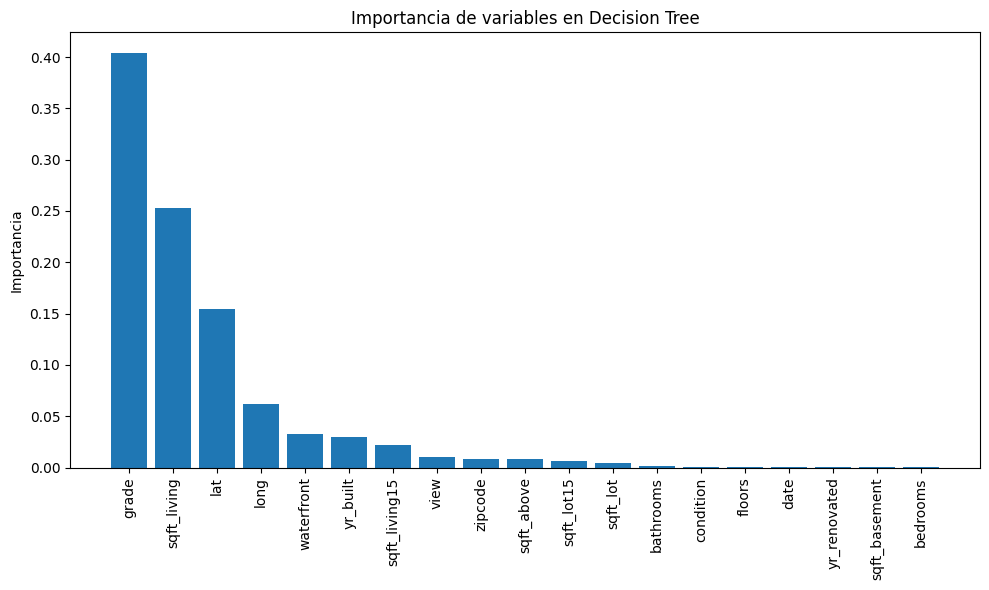

In [52]:
# 1. Obtener el mejor modelo del grid (árbol de decisión)
best_tree = grid.best_estimator_.named_steps['model']

# 2. Importancias
importances = best_tree.feature_importances_

# 3. Nombres de las variables originales
feature_names = X_train.columns

# 4. Ordenar de mayor a menor
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# 5. Gráfico
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.title("Importancia de variables en Decision Tree")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

Grade y sqft_living son las que mas influyen al precedir el precio de una vivienda

5. Elige uno de los modelos de regresión lineal con regularización implementados en el
punto anterior y gráfica cómo varían sus hiperparámetros durante el ajuste,
mostrando también cómo afectan el rendimiento del modelo

In [53]:
param_grid = [
    {
        'model': [Lasso()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    }
]

In [54]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e+13, tolerance: 1.845e+11
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso()],
                          'model__alpha': [0.001, 0.01, 0.1, 1, 10]}],
             scoring='neg_mean_squared_error')

In [58]:
grid.best_params_

{'model': Lasso(), 'model__alpha': 10}

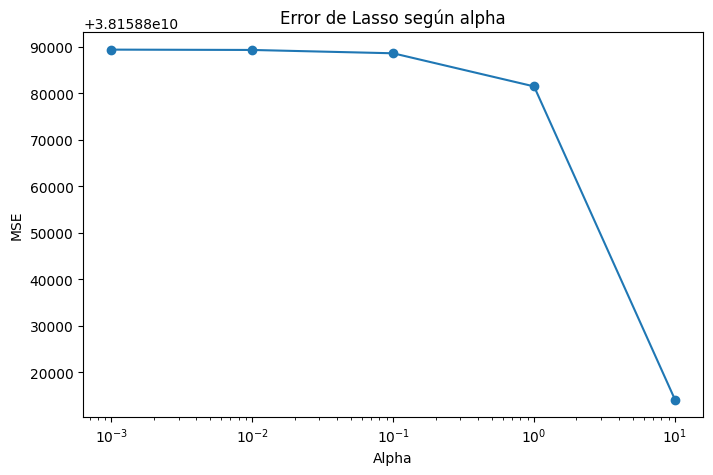

In [57]:
results = pd.DataFrame(grid.cv_results_)
lasso_results = results[results['param_model'].astype(str).str.contains('Lasso')]

# Graficar alpha vs error
plt.figure(figsize=(8, 5))
plt.plot(lasso_results['param_model__alpha'], -lasso_results['mean_test_score'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Error de Lasso según alpha')
plt.xscale('log')
plt.show()

In [59]:
param_grid = [
    {
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1, 10]
    }
]

In [60]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model': [Ridge()],
                          'model__alpha': [0.001, 0.01, 0.1, 1, 10]}],
             scoring='neg_mean_squared_error')

In [61]:
grid.best_params_

{'model': Ridge(), 'model__alpha': 10}

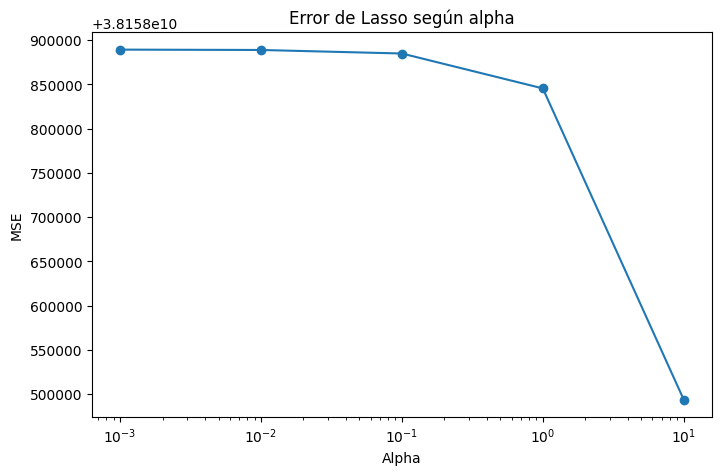

In [62]:
results = pd.DataFrame(grid.cv_results_)
ridge_results = results[results['param_model'].astype(str).str.contains('Ridge')]

# Graficar alpha vs error
plt.figure(figsize=(8, 5))
plt.plot(ridge_results['param_model__alpha'], -ridge_results['mean_test_score'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Error de Lasso según alpha')
plt.xscale('log')
plt.show()

6. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
rendimiento del modelo, realizar cuadro comparativo indicado en el punto 4, finaliza
con una breve conclusión de a los resultados obtenidos

    lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

    ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

    elastic_params = {

        'alpha': [0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }

    tree_params = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
